# An example of synthetic FRB generation

In [1]:
import numpy as np
from modules.event import Radiometer
from modules.funcs import lognormal_ampl, plot_detail

In [2]:
# Radiometer parameters (here: RATAN-600 Western Sector)

radiometer = Radiometer(
    f_range=(4400, 5000),  # radio frequency range
    n_chan=4,              # No. of radio channels
    tstep=0.000245,        # temporal resolution (seconds)
    n_tpoints=4080,        # record length (4080 x 0.000245 ~ 1 second)
    centering=False,       # centering of the pulse in the record
    l_bound=500            # least number of elements from the edge (500 x 0.000245 ~ 0.12 s)
)

SNR = 4.736248468614379


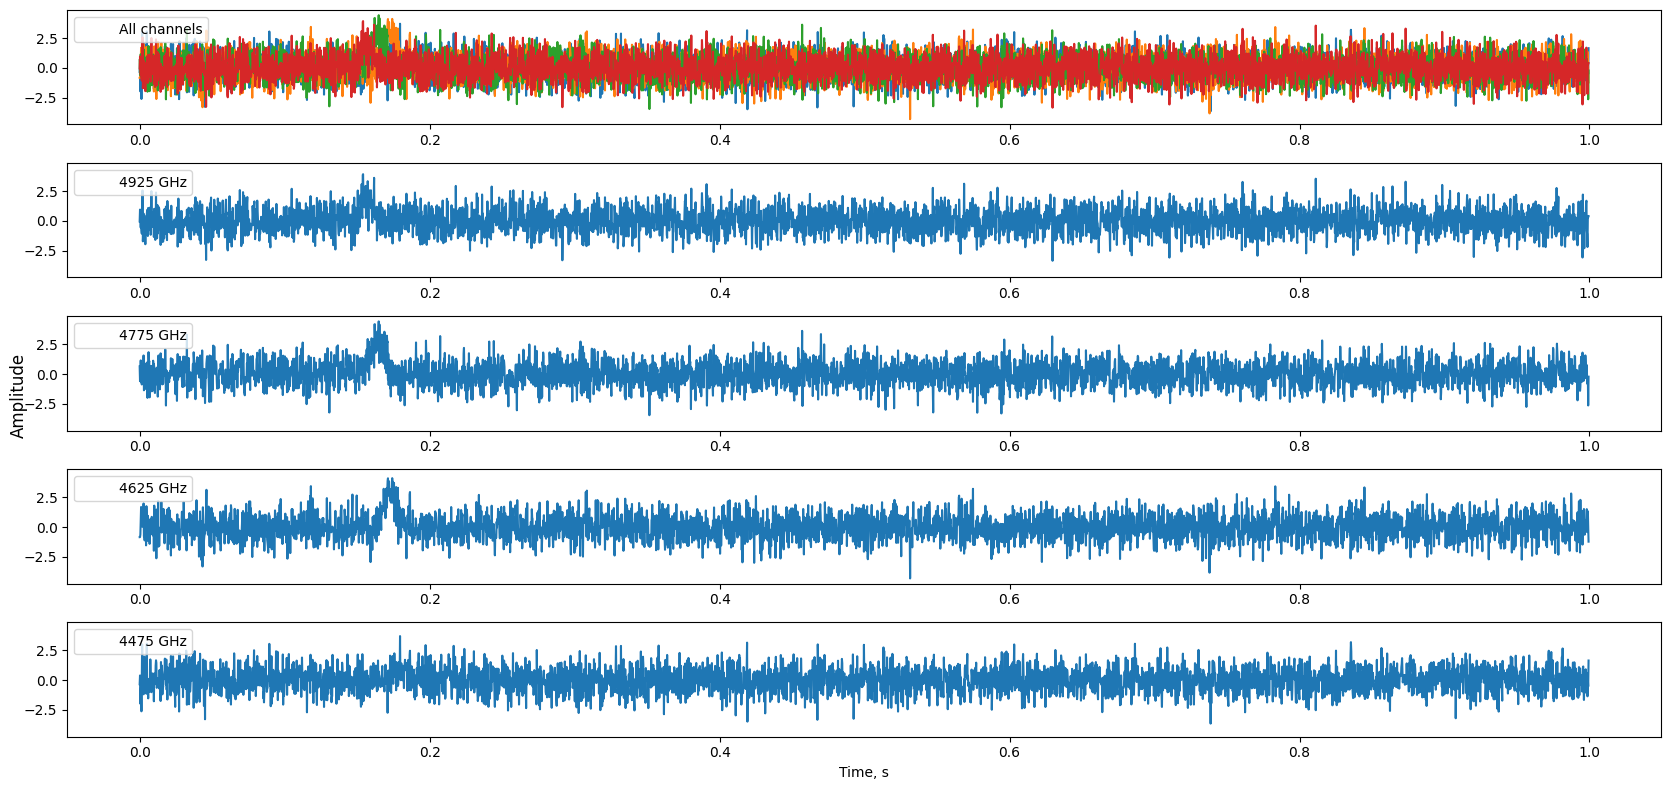

In [ ]:
width = np.random.uniform(0.00002, 0.050, 1).item()      # random width
tau = np.random.uniform(0, 1, 1).item()                  # random scattering
dm = np.random.uniform(50., 5000., 1).item()             # random DM
sp_ind = np.random.uniform(-4, 4, 1).item()              # random spectral index
ampl = lognormal_ampl(
    mu=1, sigma=1, lower_bound=2, upper_bound=np.inf)  # random amplitude

pulse, sn = radiometer.get_pulse(
    ampl=ampl,     # amplitude
    width=width,   # width in seconds
    tau=tau,       # scattering time at 1 GHz in seconds
    dm=dm,         # dispersion measure in (pc cm−3)
    sp_ind=sp_ind, # spectral index
    noise=True,    # adding synthetic noise
    scint=True     # scintillations (insert randomly in ~23% of events)
)

plot_detail(pulse)
print(f'SNR = {sn}')